Team Members

*   Libin Kutty - Group 2
*   Ritu Gahir - Group 3
*   Viju Sudhi - Group 10


In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

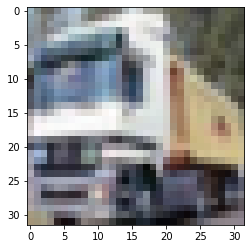

In [69]:
#(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
#(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.fashion_mnist.load_data()
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.cifar10.load_data()
plt.imshow(train_imgs[1], cmap="Greys")
train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 32, 32, 3))
train_lbls = train_lbls.astype(np.int32)

#train_lbls = to_categorical(train_lbls)
#test_lbls = to_categorical(test_lbls)

test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 32, 32, 3))
test_lbls = test_lbls.astype(np.int32)

batch_size = 32

train_data = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))

train_data = train_data.shuffle(train_imgs.shape[0])
train_data = train_data.batch(batch_size)
train_data = train_data.repeat(10)


test_data = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls))
test_data = test_data.batch(batch_size)


On MNIST Dataset:


---
          Conv2D - 32 5x5 filters Activation -RelU         Conv2D - 32 3x3 filters Activation -RelU                  
          MaxPooling - 2x2                                 MaxPooling - 2x2
          Conv2D - 64 5x5 filters Activation -RelU         Conv2D - 64 3x3 filters Activation -RelU
          MaxPooling - 2x2                                 MaxPooling - 2x2
          Flatten Layer                                    Flatten Layer
          Dense Layer - 10 Activation - Softmax            Dense Layer - 10 Activation - Softmax

          Training Accuracy - 86.39%                       Training Accuracy - 96.27%
          Test Accuracy - 87.05%                           Test Accuracy - 96.81%

On Fashion MNIST Dataset


---
          Conv2D - 32 3x3 filters Activation -RelU        Conv2D - 32 1x1 filters Activation -RelU        Conv2D - 32 1x1 filters Activation -RelU 
          MaxPooling - 2x2                                MaxPooling - 2x2                                Maxpooling - 2x2
          Conv2D - 64 3x3 filters Activation -RelU        Conv2D - 64 1x1 filters Activation -RelU
          MaxPooling - 2x2                                MaxPooling - 2x2
          Flatten Layer                                   Flatten Layer                                   Flatten Layer
          Dense Layer - 10 Activation - Softmax           Dense Layer - 10 Activation - Softmax           Dense Layer - 10 Activation - Softmax

          Training Accuracy - 77.46%                      Training Accuracy - 79.28%                      Training Accuracy - 88.96%
          Test Accuracy - 78.43%                          Test Accuracy - 80.08%                          Test Accuracy - 87.55%

On Cifar-10 Dataset


---
          Conv2D - 32 3x3 filters Activation -RelU         Conv2D - 32 3x3 filters Activation -RelU                  
          MaxPooling - 2x2                                 MaxPooling - 2x2
          Conv2D - 64 3x3 filters Activation -RelU         Conv2D - 64 3x3 filters Activation -RelU
          MaxPooling - 2x2                                 MaxPooling - 2x2
                                                           Conv2D - 128 3x3
                                                           MaxPooling - 2x2
          Flatten Layer                                    Flatten Layer
                                                           Dense Layer - 128
          Dense Layer - 10 Activation - Softmax            Dense Layer - 10 Activation - Sigmoid

          Training Accuracy - 54.36%                       Training Accuracy - 64.06%
          Test Accuracy - 53.57%                           Test Accuracy - 60.11%



In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=train_imgs.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(64))
#model.add(Dropout(0.2))

model.add(Dense(128))
#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_34 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_35 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)        

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = tf.optimizers.SGD(lr=0.001, momentum=0.9)
loss_fn = tf.losses.SparseCategoricalCrossentropy()

In [0]:
#opt = tf.optimizers.Adam()
#opt = tf.optimizers.SGD()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [71]:

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(train_data):
    #if step > train_steps:
    #    break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        xent = loss_fn(lbl_batch, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)

    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 500:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.766986608505249 Accuracy: 0.09375
Loss: 1.7344261407852173 Accuracy: 0.29600000381469727
Loss: 1.496157169342041 Accuracy: 0.4245625138282776
Loss: 1.0503228902816772 Accuracy: 0.47725000977516174
Loss: 1.1739262342453003 Accuracy: 0.5166416168212891
Loss: 1.1898695230484009 Accuracy: 0.5454375147819519
Loss: 1.2036811113357544 Accuracy: 0.575124979019165
Loss: 1.278357744216919 Accuracy: 0.6067942976951599
Loss: 1.26914381980896 Accuracy: 0.6250625252723694
Loss: 1.0787897109985352 Accuracy: 0.6414374709129333
Loss: 0.7021675705909729 Accuracy: 0.6663538813591003
Loss: 0.9112082719802856 Accuracy: 0.6804999709129333
Loss: 0.9541894793510437 Accuracy: 0.6851249933242798
Loss: 0.8526445627212524 Accuracy: 0.7088338136672974
Loss: 0.5019097328186035 Accuracy: 0.7214375138282776
Loss: 0.5566748380661011 Accuracy: 0.7166875004768372
Loss: 0.9373372197151184 Accuracy: 0.7364864945411682
Loss: 0.8003164529800415 Accuracy: 0.7558125257492065
Loss: 0.48173120617866516 Accuracy: 0.74668

In [72]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7208999991416931


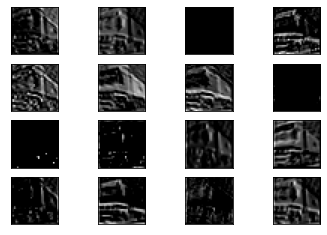

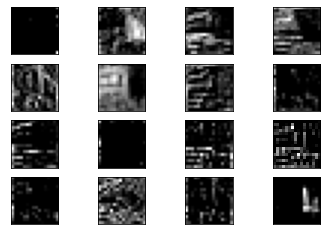

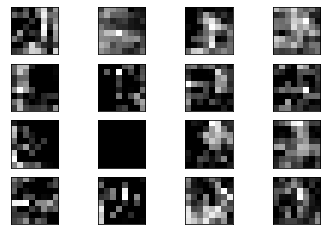

In [73]:
from matplotlib import pyplot
import tensorflow as tf
#from tf.keras.models import Model

ixs = [0, 3, 6]
outputs = [model.layers[i].output for i in ixs]
fm_model = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)
img = train_imgs[1].reshape(-1,32,32,3)

feature_maps = fm_model.predict(img)

square = 4
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()